```{contents}
```

# Regression & Classification

## **1. KNN for Classification**

**Goal:** Assign a class label to a new data point based on its neighbors.

### **Step-by-Step Process:**

1. **Choose `k`** – the number of nearest neighbors to consider.
2. **Compute distances** – calculate the distance between the new point and all points in the training set (commonly Euclidean).
3. **Find nearest neighbors** – select the `k` points closest to the new point.
4. **Vote for the class** – the most frequent class among the neighbors is assigned to the new point.
5. **Optional:** use **distance weighting**, so closer neighbors count more in voting.

### **Example Intuition:**

Imagine a 2D plot:

* Red and Blue points represent two classes.
* A new point appears (green).
* If its 3 nearest neighbors are 2 red and 1 blue → predict **Red**.

### **Metrics for Evaluation:**

* Accuracy, Precision, Recall, F1-score, Confusion Matrix.

---

## **2. KNN for Regression**

**Goal:** Predict a continuous value for a new data point.

### **Step-by-Step Process:**

1. **Choose `k`** – number of nearest neighbors.
2. **Compute distances** – measure closeness between the new point and all training points.
3. **Find nearest neighbors** – select the `k` closest points.
4. **Average the values** – the predicted value is the **mean (or weighted mean) of the neighbors’ target values**.
5. **Optional:** weight neighbors inversely by distance.

### **Example Intuition:**

* Suppose you want to predict house prices based on size.
* A new house appears.
* Take the `k` nearest houses by size and average their prices → predicted price.

### **Metrics for Evaluation:**

* Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R² score.

---

## **3. Key Differences Between Classification and Regression**

| Aspect             | Classification                  | Regression                           |
| ------------------ | ------------------------------- | ------------------------------------ |
| Output             | Discrete class label            | Continuous numeric value             |
| Prediction Method  | Majority vote of neighbors      | Mean (or weighted mean) of neighbors |
| Evaluation Metrics | Accuracy, Precision, Recall, F1 | MSE, RMSE, MAE, R²                   |
| Example            | Predict if email is spam or not | Predict house price                  |

---

## **4. Visualization Example (Intuition)**

* **Classification:** points in 2D space colored by class. A new point takes the class of majority of nearby points.
* **Regression:** points in 2D space with numeric values. The new point’s value is averaged from nearby points.

---

KNN is powerful because it’s **simple, intuitive, and non-parametric**, but its performance depends heavily on:

1. Choice of `k`
2. Distance metric
3. Feature scaling



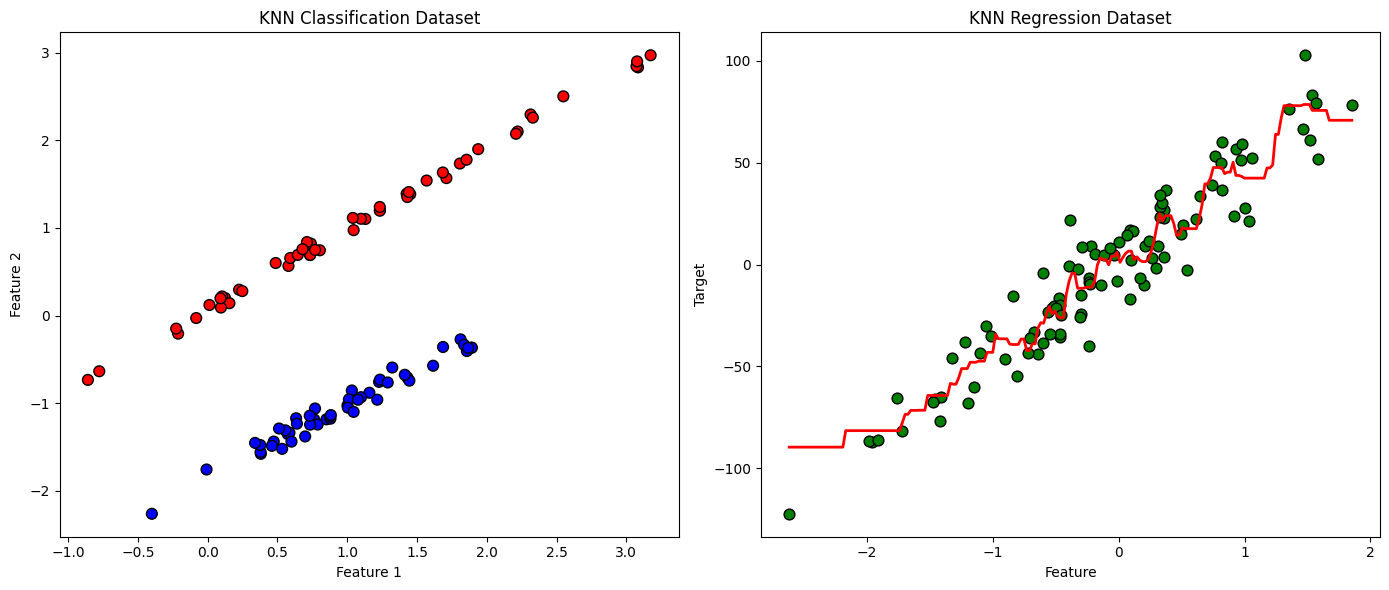

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Classification dataset
X_clf, y_clf = make_classification(n_samples=100, n_features=2, n_informative=2,
                                   n_redundant=0, n_clusters_per_class=1, random_state=42)
# Regression dataset
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_clf, y_clf)

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_reg, y_reg)

# Plotting Classification
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(X_clf[:,0], X_clf[:,1], c=y_clf, cmap='bwr', edgecolor='k', s=60)
plt.title('KNN Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting Regression
plt.subplot(1,2,2)
plt.scatter(X_reg[:,0], y_reg, color='green', edgecolor='k', s=60)
# Generate predictions for a smooth line
X_line = np.linspace(X_reg.min(), X_reg.max(), 200).reshape(-1,1)
y_line = knn_reg.predict(X_line)
plt.plot(X_line, y_line, color='red', linewidth=2)
plt.title('KNN Regression Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')

plt.tight_layout()
plt.show()
